In [ ]:
# 爬蟲

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://goodinfo.tw/StockInfo/StockBzPerformance.asp?STOCK_ID=2330'
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'
}

In [3]:
res = requests.get(url,headers = headers)
res.encoding= 'uft-8'
res.text

'\r\n<!doctype html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html lang="zh-Hant">\r\n<head>\r\n\r\n<meta charset="UTF-8">\r\n<meta name="viewport" content="width=device-width">\r\n<meta name="description" content="(2330) 台積電歷年財報評比,股票成交價格,成交量,獲利能力(如:營業收入,淨利,營業毛利率,淨利率),股東權益報酬率ROE,資產報酬率ROA,每股盈餘EPS,每股淨值BPS,現金股利,股票股利,殖利率 等交易資料統計">\r\n<title>(2330) 台積電歷年經營績效統計 - 合併財報 - Goodinfo!台灣股市資訊網</title>\r\n\r\n<link rel="canonical" href="https://goodinfo.tw/StockInfo/StockBzPerformance.asp?STOCK_ID=2330&RPT_CAT=M%5FYEAR"/>\r\n<link rel="icon" href="image/Goodinfo.ico">\r\n<link rel="stylesheet" type="text/css" href="../Library/css/normalize201_UTF-8.css"/>\r\n<link rel="stylesheet" type="text/css" href="../Library/css/Public_UTF-8.css"/>\r\n<link rel="stylesheet" type="text/css" href="../Library/jsp/JSCal2-1.8/src/css/jscal2.css" />\r\n<link rel="stylesheet" type="text/css" href="../Library/jsp/JSCal2-1.8/src/css/border-radius.css" 

In [4]:
soup = BeautifulSoup(res.text,'lxml')

In [5]:
data= soup.select_one('#txtFinDetailData')


In [6]:
import pandas
dfa = pandas.read_html(data.prettify())
dfa=dfa[1]


In [7]:
dfa.columns  = dfa.columns.get_level_values(3)


In [9]:
dfa.columns



Index(['年度', '股本  (億)', '財報  評分', '收盤', '平均', '漲跌', '漲跌  (%)', '營業  收入',
       '營業  毛利', '營業  利益', '業外  損益', '稅後  淨利', '營業  毛利', '營業  利益', '業外  損益',
       '稅後  淨利', 'ROE  (%)', 'ROA  (%)', '稅後  EPS', '年增  (元)', 'BPS  (元)'],
      dtype='object')

In [10]:
dfa.drop(columns=['業外  損益','業外  損益', '年增  (元)', 'BPS  (元)'])

,年度,股本 (億),財報 評分,收盤,平均,漲跌,漲跌 (%),營業 收入,營業 毛利,營業 利益,稅後 淨利,營業 毛利,營業 利益,稅後 淨利,ROE (%),ROA (%),稅後 EPS
0,20Q2,2593,96,453,346,+122,+36.9,6213,3254,2596,2378,52.4,41.8,38.3,28.5 (年估),20.2 (年估),9.17
1,2019,2593,89,331,262,+105.5,+46.8,10700,4927,3727,3453,46,34.8,32.3,20.9,15.9,13.32
2,2018,2593,94,225.5,237,-4,-1.7,10315,4979,3836,3511,48.3,37.2,34,21.9,17.2,13.54
3,2017,2593,91,229.5,210,+48,+26.4,9774,4948,3856,3431,50.6,39.4,35.1,23.6,17.7,13.23
4,2016,2593,91,181.5,166,+38.5,+26.9,9479,4748,3780,3342,50.1,39.9,35.3,25.6,18.9,12.89
5,2015,2593,94,143,140,+2,+1.4,8435,4104,3200,3066,48.7,37.9,36.3,27,19.4,11.82
6,2014,2593,91,141,123,+35.5,+33.6,7628,3777,2959,2639,49.5,38.8,34.6,27.9,19.1,10.18
7,2013,2593,89,105.5,104,+8.5,+8.8,5970,2809,2094,1881,47.1,35.1,31.5,23.9,16.9,7.26
8,2012,2592,89,97,84.1,+21.2,+28,5067,2441,1812,1663,48.2,35.8,32.8,24.5,19.1,6.42
9,2011,2592,94,75.8,72.1,+4.8,+6.8,4271,1941,1416,1342,45.5,33.1,31.5,22.2,18,5.18


In [11]:
type(dfa)

pandas.core.frame.DataFrame

In [12]:
#載入畫圖套件
import matplotlib
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

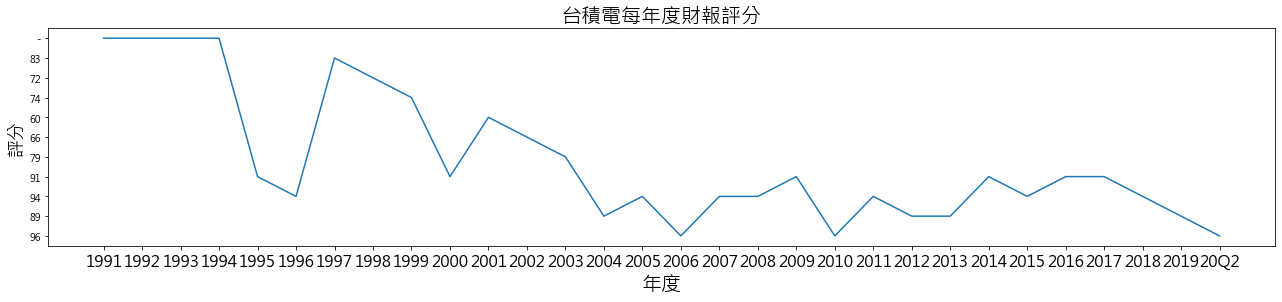

In [13]:
fig = plt.figure()
#調整大小
plt.figure(figsize=(22,4))
plt.xticks(fontsize=16)

plt.plot(dfa['年度'],dfa['財報  評分'])

#更改年度排序(由小到大)
plt.gca().invert_xaxis()
#文字標籤
plt.xlabel("年度",fontsize=20)
plt.ylabel("評分",fontsize=18)
plt.title("台積電每年度財報評分",fontsize=20)
#顯示中文字
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.show()

In [14]:
#seaborn 
import seaborn as sns

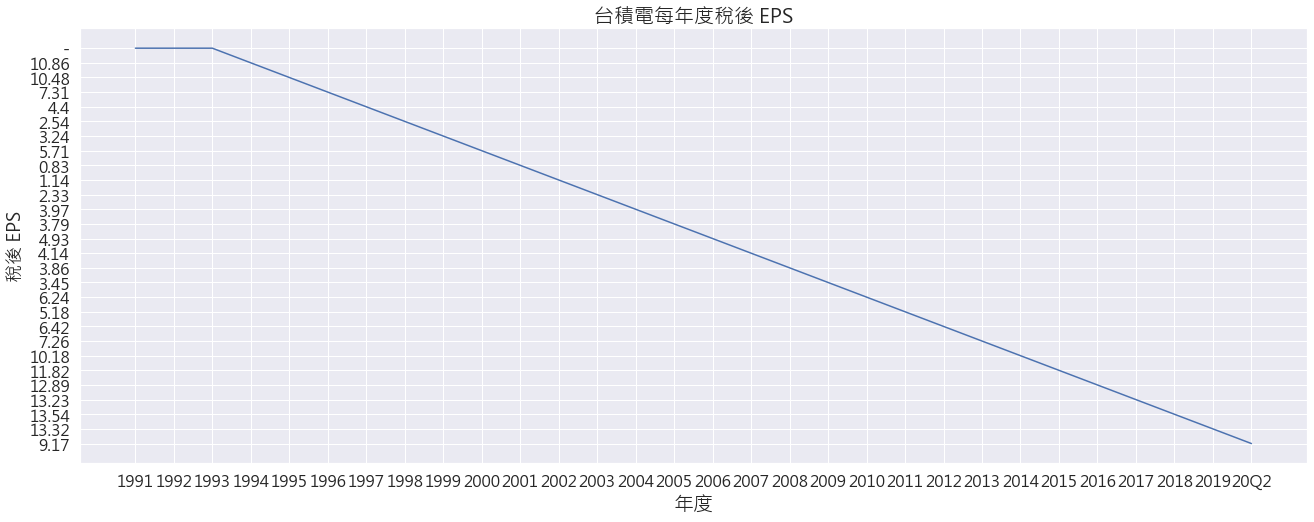

In [15]:
sns.set()
plt.figure(figsize=(22,8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(dfa['年度'],dfa['稅後  EPS'])
plt.gca().invert_xaxis()
#文字標籤
plt.xlabel("年度",fontsize=20)
plt.ylabel("稅後 EPS",fontsize=18)
plt.title("台積電每年度稅後 EPS",fontsize=20)
#顯示中文字
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False